In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("cathet.csv")
df.head()

,t,V
0,0,0.000000
1,39,0.000008
2,131,0.000027
3,184,0.000038
4,214,0.000044


In [3]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('polynomial', PolynomialFeatures(5)),
    ('ols', TransformedTargetRegressor(
        LinearRegression(fit_intercept=False), transformer=MinMaxScaler()
    ))
])

In [4]:
X = df[['t']].values
y = df['V'].values

In [5]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('polynomial', PolynomialFeatures(degree=5)),
                ('ols',
                 TransformedTargetRegressor(regressor=LinearRegression(fit_intercept=False),
                                            transformer=MinMaxScaler()))])

In [6]:
pipe.score(X, y)

0.9999769561903573

In [7]:
yhat = pipe.predict(X)

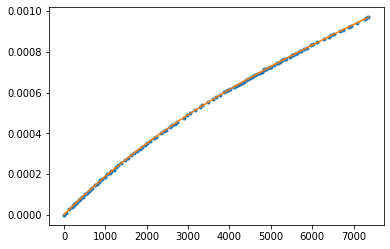

In [8]:
fig, axe = plt.subplots()
axe.plot(X, y, '.')
axe.plot(X, yhat)

In [9]:
x = pipe.steps[-1][1]
print(x.regressor_.coef_, x.regressor_.intercept_)
#print(dir(x))

[ 1.40217412e-03  1.54164355e+00 -8.74877355e-01  3.19321578e-01
  6.63796996e-02 -5.27764575e-02] 0.0


In [39]:
x = df.set_index('t')

In [40]:
x = x.reindex(range(x.index.max())).interpolate()

In [59]:
x["Vs"] = signal.savgol_filter(x["V"], 101, 3)

<AxesSubplot:xlabel='t'>

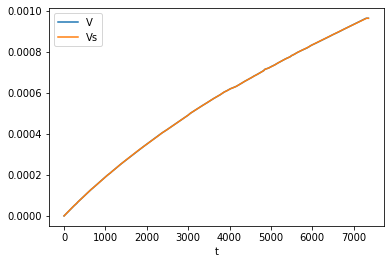

In [60]:
x.plot()

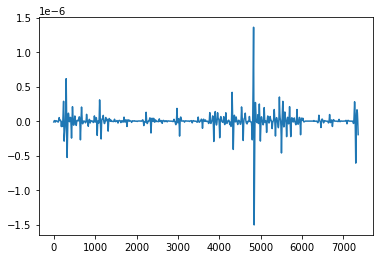

In [61]:
plt.plot(np.diff(x))